In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import time
import matplotlib.pyplot as plt


import torch 
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
                                transforms.Resize((32, 32)),
                                transforms.CenterCrop((32, 32)),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5), (0.5))])

trainset = datasets.CIFAR10('CIFAR_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.CIFAR10('CIFAR_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


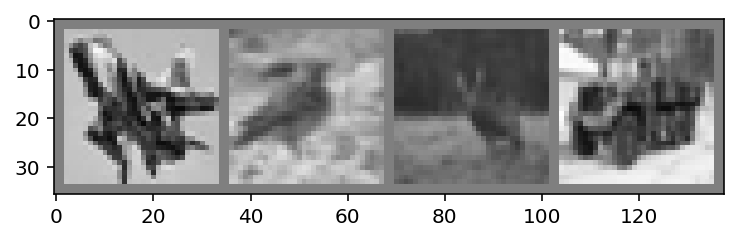

plane  bird  deer truck


In [ ]:
def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images, labels = next(iter(trainloader))

imshow(torchvision.utils.make_grid([image for image in images[:4]]))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
input_size = 1024
hidden_sizes = [512, 256, 128, 64, 32]
output_size = 10

model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                      ('relu3', nn.ReLU()),
                      ('fc4', nn.Linear(hidden_sizes[2], hidden_sizes[3])),
                      ('relu4', nn.ReLU()),
                      ('fc5', nn.Linear(hidden_sizes[3], hidden_sizes[4])),
                      ('relu5', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[4], output_size))]))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
images, lables = next(iter(trainloader))
images.resize_(images.shape[0], 1024)

output = model.forward(images)
ps = F.softmax(output, dim=1)
equality = (labels.data==ps.max(dim=1)[1])
equality

tensor([ True, False, False, False, False, False, False,  True, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False,  True, False, False, False, False,
        False, False,  True, False, False, False,  True, False, False, False,
        False, False, False, False, False,  True,  True, False, False, False,
        False, False, False, False])

In [ ]:
def validation(model, testloader, criterion):
  test_loss = 0
  accuracy = 0
  for images, labels in testloader:
    images.resize_(images.shape[0], 1024)

    output = model.forward(images)
    test_loss += criterion(output, labels).item()

    ps = F.softmax(output, dim=1)
    equality = (labels.data==ps.max(dim=1)[1])
    accuracy = equality.type(torch.FloatTensor).mean()
  return test_loss, accuracy

In [ ]:
epochs = 3
print_every = 64
steps = 0
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    steps += 1
    images.resize_(images.shape[0], 1024)

    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if steps % print_every == 0:

      with torch.no_grad():
        test_loss, accuracy = validation(model, testloader, criterion)

      print("Epoch: {}/{}...".format(e+1, epochs),
            "Training Loss: {:.3f}".format(running_loss/print_every),
            "Test Loss: {:.3f}".format(test_loss/len(testloader)),
            "Test Accuracy: {:.3f}".format(accuracy))
      
      running_loss = 0

Epoch: 1/3... Training Loss: 2.205 Test Loss: 2.225 Test Accuracy: 0.062
Epoch: 1/3... Training Loss: 2.116 Test Loss: 2.081 Test Accuracy: 0.312
Epoch: 1/3... Training Loss: 2.076 Test Loss: 2.087 Test Accuracy: 0.188
Epoch: 1/3... Training Loss: 2.070 Test Loss: 2.031 Test Accuracy: 0.250
Epoch: 1/3... Training Loss: 2.045 Test Loss: 2.032 Test Accuracy: 0.188
Epoch: 1/3... Training Loss: 2.067 Test Loss: 2.074 Test Accuracy: 0.125
Epoch: 1/3... Training Loss: 2.038 Test Loss: 2.058 Test Accuracy: 0.125
Epoch: 1/3... Training Loss: 2.037 Test Loss: 2.038 Test Accuracy: 0.188
Epoch: 1/3... Training Loss: 2.012 Test Loss: 1.997 Test Accuracy: 0.188
Epoch: 1/3... Training Loss: 1.996 Test Loss: 1.985 Test Accuracy: 0.188
Epoch: 1/3... Training Loss: 2.030 Test Loss: 1.974 Test Accuracy: 0.250
Epoch: 1/3... Training Loss: 1.982 Test Loss: 1.975 Test Accuracy: 0.188
Epoch: 2/3... Training Loss: 1.596 Test Loss: 1.972 Test Accuracy: 0.312
Epoch: 2/3... Training Loss: 1.984 Test Loss: 1.954

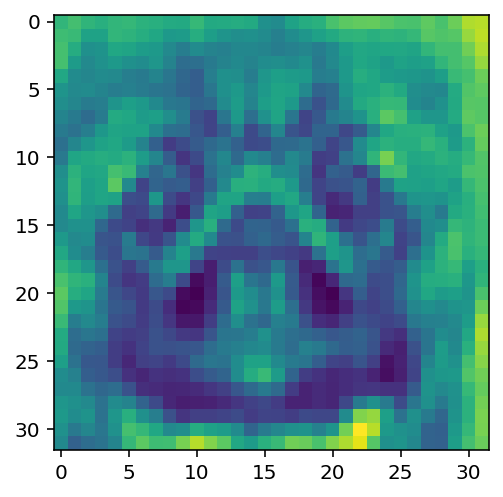

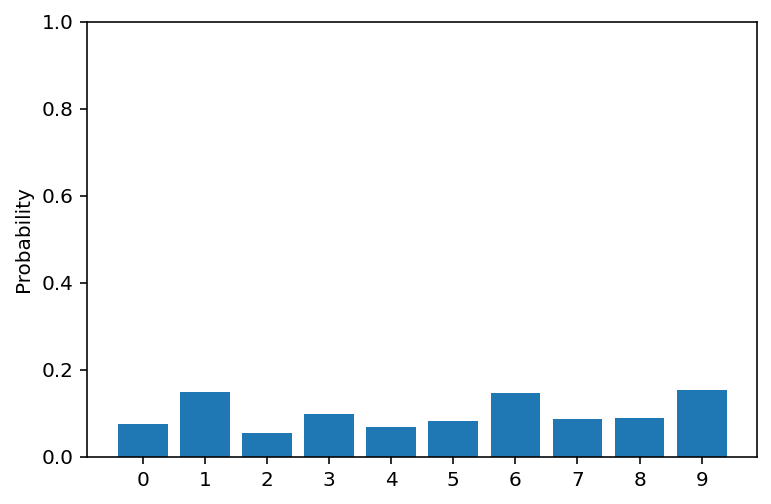

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images, labels = next(iter(trainloader))

img = images[7].view(1, 1024)
plt.imshow(images[7][0])
plt.show()

with torch.no_grad():
  logits = model.forward(img)

prob = F.softmax(logits, dim=1)
y = prob.detach()[0].numpy()
x = [x for x in range(10)]

plt.ylim([0, 1])
p1 = plt.bar(x, y)
plt.ylabel('Probability')
plt.xticks(x)

plt.show()

In [ ]:
torch.save(model, 'checkpoint.pth')

In [ ]:
model = torch.load('checkpoint.pth')

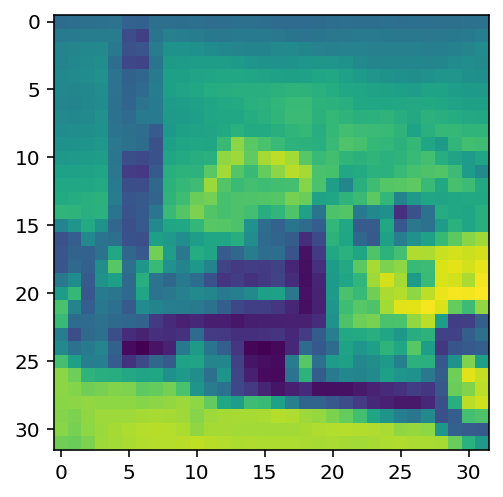

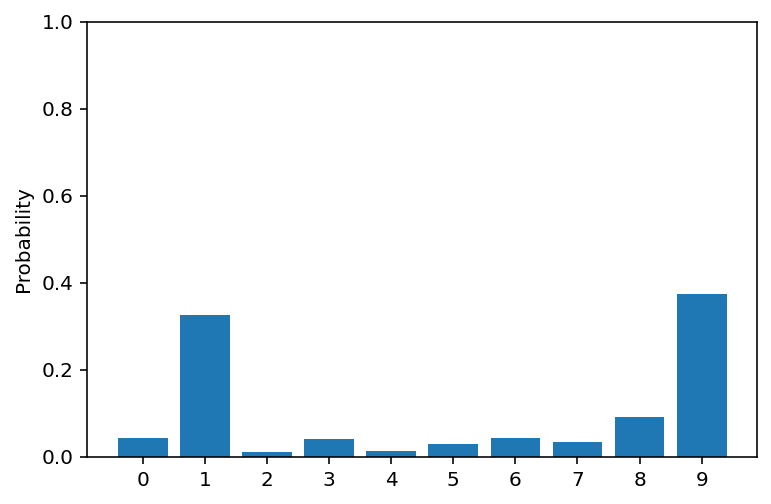

In [ ]:
images, labels = next(iter(trainloader))

img = images[7].view(1, 1024)
plt.imshow(images[7][0])
plt.show()

with torch.no_grad():
  logits = model.forward(img)

prob = F.softmax(logits, dim=1)
y = prob.detach()[0].numpy()
x = [x for x in range(10)]

plt.ylim([0, 1])
p1 = plt.bar(x, y)
plt.ylabel('Probability')
plt.xticks(x)

plt.show()

In [ ]:
# from google.colab import files
# files.download('checkpoint.pth')